In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img=cv2.imread('D:\SEM 3\Fundamentals of Image Processing Lab\water_coins.jpg')

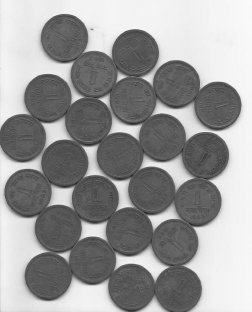

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
#OTSU method for getting binary image.
ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

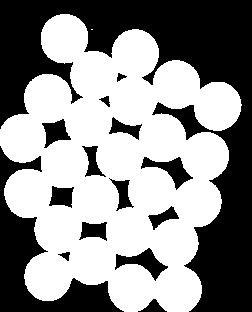

In [ ]:
plt.imshow(thresh)
plt.show()

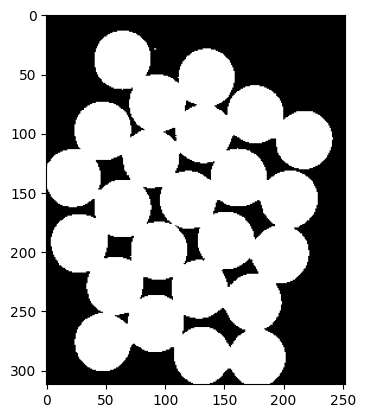

In [ ]:
plt.imshow(thresh,'gray')

Morphology Operation

In [ ]:
#to remove noise
k=cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,k, iterations = 2) # to segregate them.

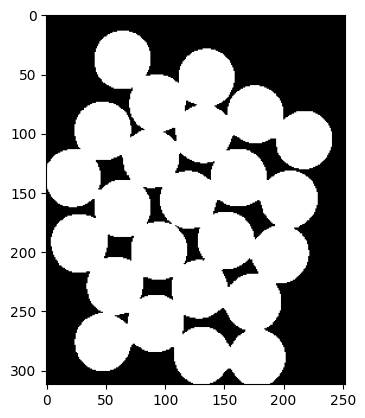

In [ ]:
plt.imshow(opening,'gray')
plt.show()

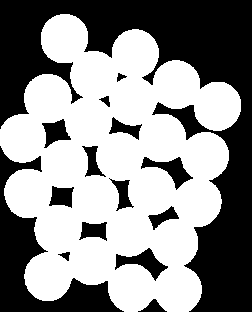

In [ ]:
plt.imshow(opening)

### Dilation

In [ ]:
# sure background area
bg = cv2.dilate(opening,k,iterations=3)#to get more black.

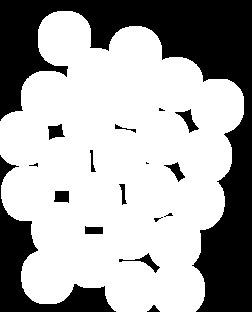

In [ ]:
plt.imshow(bg,cmap="gray")
plt.show()

In [ ]:
# distance transform.(to get local minima)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5) #l2 norm.

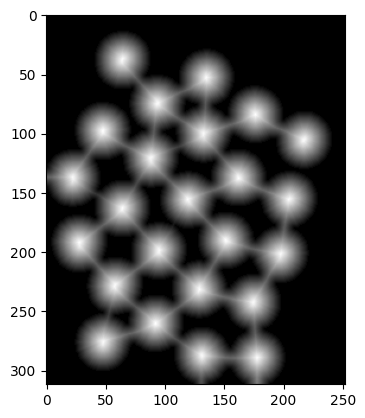

In [ ]:
plt.imshow(dist_transform ,'gray')
plt.show()

In [ ]:
# thresholding (to get the object).

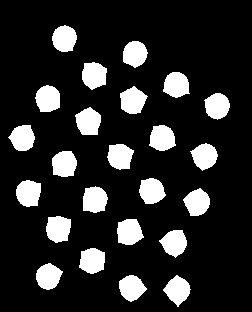

In [ ]:
ret,sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),255,cv2.THRESH_BINARY)
sure_fg=sure_fg.astype(np.uint8)
plt.imshow(sure_fg,cmap="gray")
plt.show()


In [ ]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(bg,sure_fg)

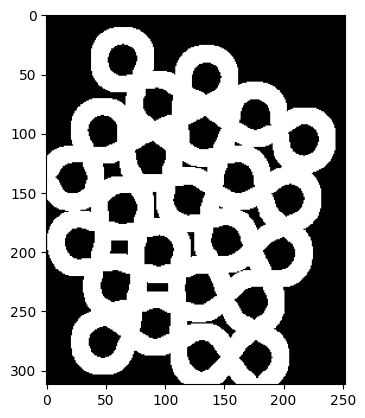

In [ ]:
plt.imshow(unknown,'gray')
plt.show()

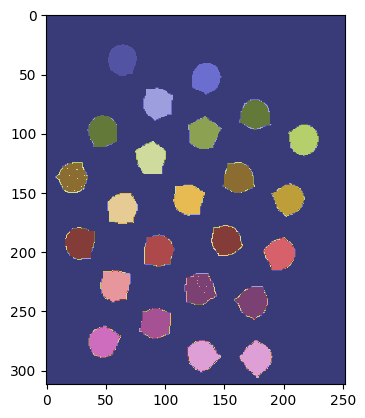

In [ ]:
r3,M=cv2.connectedComponents(sure_fg)
M=M+1#give 1 to background not 0.
M[unknown==255]=0 #255=white in uknown.
plt.imshow(M,'tab20b')
plt.show()

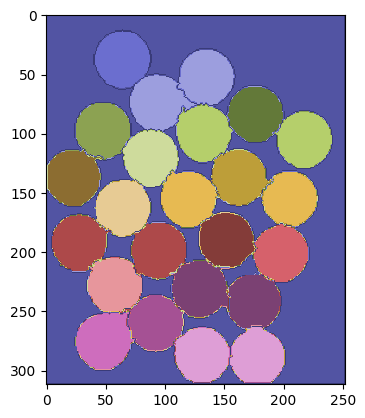

In [ ]:
# Watershed
Img=cv2.imread("D:\SEM 3\Fundamentals of Image Processing Lab\water_shed.png")
M2=cv2.watershed(Img,M)
plt.imshow(M,'tab20b')
plt.show()

To Get The **Contours**

In [ ]:
L=np.unique(M2) # uique label
New_img=[]

In [ ]:
print(L)

[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


In [ ]:
for l in L[2:]:
  T=np.where(M2==l,255,0).astype(np.uint8)
  c,h=cv2.findContours(T,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  New_img.append(c[0])

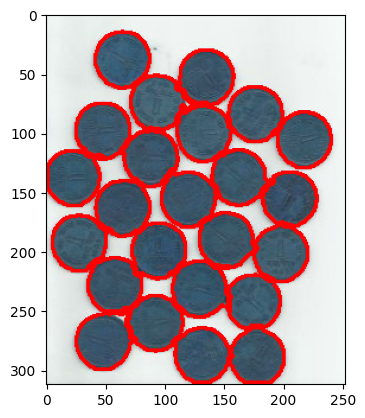

In [ ]:
II=cv2.drawContours(Img,New_img,-1,color=(255,0,0),thickness=2) #coloured image original, -1=depth.
plt.imshow(II)
plt.show()